# Train Log 20181031

## Results
```
```

## Trained model
* [Download link]()

## Evaluation
* Incorrect sample
![results]()

In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import time , datetime

sys.path.append( os.path.abspath('../../../Dataset/scripts'))
from utils import *

sys.path.append( os.path.abspath('../../model') )
from train import *
import model as MODEL

In [5]:
""" Path """

data_train_path_list = []
data_test_path_list = []
data_vali_path_list = []

data_train_path = os.path.abspath('../../../Dataset/dataset/db_aug_v4_20181031_ndb_aug_v2_20181020/train.h5')
data_test_path = os.path.abspath('../../../Dataset/dataset/db_aug_v4_20181031_ndb_aug_v2_20181020/test.h5')
data_vali_path = os.path.abspath('../../../Dataset/dataset/db_aug_v4_20181031_ndb_aug_v2_20181020/vali.h5')
data_train_path_list.append(data_train_path)
data_test_path_list.append(data_test_path)
data_vali_path_list.append(data_vali_path)

data_train_path = os.path.abspath('../../../Dataset/dataset/db_aug_v4_v_500_20181031_ndb_aug_v2_20181020/train.h5')
data_test_path = os.path.abspath('../../../Dataset/dataset/db_aug_v4_v_500_20181031_ndb_aug_v2_20181020/test.h5')
data_vali_path = os.path.abspath('../../../Dataset/dataset/db_aug_v4_v_500_20181031_ndb_aug_v2_20181020/vali.h5')
data_train_path_list.append(data_train_path)
data_test_path_list.append(data_test_path)
data_vali_path_list.append(data_vali_path)

data_train_path = os.path.abspath('../../../Dataset/dataset/db_aug_v4_v_400_20181031_ndb_aug_v2_20181020/train.h5')
data_test_path = os.path.abspath('../../../Dataset/dataset/db_aug_v4_v_400_20181031_ndb_aug_v2_20181020/test.h5')
data_vali_path = os.path.abspath('../../../Dataset/dataset/db_aug_v4_v_400_20181031_ndb_aug_v2_20181020/vali.h5')
data_train_path_list.append(data_train_path)
data_test_path_list.append(data_test_path)
data_vali_path_list.append(data_vali_path)

data_train_path = os.path.abspath('../../../Dataset/dataset/db_aug_v4_v_300_20181031_ndb_aug_v2_20181020/train.h5')
data_test_path = os.path.abspath('../../../Dataset/dataset/db_aug_v4_v_300_20181031_ndb_aug_v2_20181020/test.h5')
data_vali_path = os.path.abspath('../../../Dataset/dataset/db_aug_v4_v_300_20181031_ndb_aug_v2_20181020/vali.h5')
data_train_path_list.append(data_train_path)
data_test_path_list.append(data_test_path)
data_vali_path_list.append(data_vali_path)

data_train_path = os.path.abspath('../../../Dataset/dataset/db_aug_v4_v_200_20181031_ndb_aug_v2_20181020/train.h5')
data_test_path = os.path.abspath('../../../Dataset/dataset/db_aug_v4_v_200_20181031_ndb_aug_v2_20181020/test.h5')
data_vali_path = os.path.abspath('../../../Dataset/dataset/db_aug_v4_v_200_20181031_ndb_aug_v2_20181020/vali.h5')
data_train_path_list.append(data_train_path)
data_test_path_list.append(data_test_path)
data_vali_path_list.append(data_vali_path)

data_train_path = os.path.abspath('../../../Dataset/dataset/db_aug_v4_v_100_20181031_ndb_aug_v2_20181020/train.h5')
data_test_path = os.path.abspath('../../../Dataset/dataset/db_aug_v4_v_100_20181031_ndb_aug_v2_20181020/test.h5')
data_vali_path = os.path.abspath('../../../Dataset/dataset/db_aug_v4_v_100_20181031_ndb_aug_v2_20181020/vali.h5')
data_train_path_list.append(data_train_path)
data_test_path_list.append(data_test_path)
data_vali_path_list.append(data_vali_path)



log_path = os.path.abspath('./train_log_20181031.txt')

model_save_path = os.path.abspath('./model')
if not os.path.isdir(model_save_path) : os.mkdir(model_save_path)

""" Parameters """
GPU_INDEX = 0
NUM_POINT = 256
NUM_CLASSES = 3

BN_INIT_DECAY = 0.5
BN_DECAY_DECAY_RATE = 0.5
BN_DECAY_DECAY_STEP = float(200000)
BN_DECAY_CLIP = 0.99
DECAY_STEP = BN_DECAY_DECAY_STEP
DECAY_RATE = BN_DECAY_DECAY_RATE

BATCH_SIZE = 250

MOMENTUM = 0.9

BASE_LEARNING_RATE = 0.001

OPTIMIZER = 'adam'

MAX_EPOCH = 10

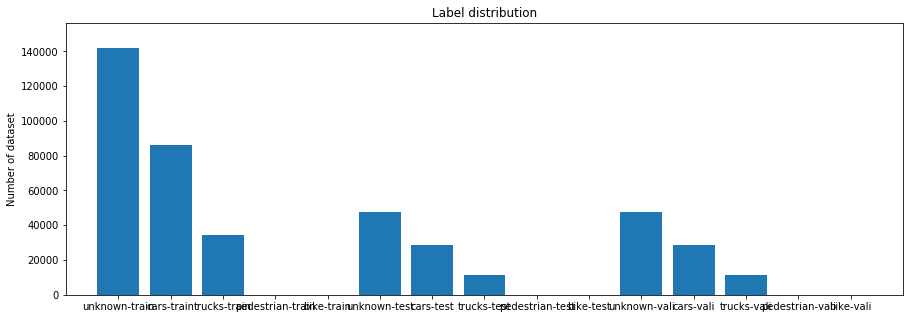

In [6]:
""" Load dataset"""

data = []
label = []

data_train, label_train = load_h5(data_train_path_list[0])
data_vali, label_vali = load_h5(data_vali_path_list[0])
data_test, label_test = load_h5(data_test_path_list[0])
    
for i in range( 1, len(data_train_path_list) ):

    d_train, l_train = load_h5(data_train_path_list[i])
    d_vali, l_vali = load_h5(data_vali_path_list[i])
    d_test, l_test = load_h5(data_test_path_list[i])
    
    data_train = np.concatenate( (data_train, d_train), axis = 0 )
    data_vali = np.concatenate( (data_vali, d_vali), axis = 0 )
    data_test = np.concatenate( (data_test, d_test), axis = 0 )
    
    label_train = np.concatenate( (label_train, l_train), axis = 0 )
    label_vali = np.concatenate( (label_vali, l_vali), axis = 0 )
    label_test = np.concatenate( (label_test, l_test), axis = 0 )
    

data.append(data_train)
data.append(data_vali)
data.append(data_test)

label.append(label_train)
label.append(label_vali)
label.append(label_test)

""" Data statistics"""

label_list = [0,1,2,3,4]

y_val = []
for i in range( len ( data) ):
    for j in range ( len ( label_list ) ):
        y_val.append(np.sum(label[i] == label_list[j]))

x_name=('unknown-train', 'cars-train', 'trucks-train', 'pedestrian-train', 'bike-train',
        'unknown-test', 'cars-test', 'trucks-test', 'pedestrian-test', 'bike-test',
        'unknown-vali', 'cars-vali', 'trucks-vali', 'pedestrian-vali', 'bike-vali')

index = range( len(x_name) )

plt.figure(figsize=(15,5))
plt.bar(index, y_val, tick_label=x_name, align='center')
plt.ylabel('Number of dataset')
plt.title('Label distribution')
plt.xlim( -1, len(x_name))
plt.ylim( 0, np.max(y_val) * 1.1 )
plt.show()

In [11]:
""" log file """
LOG_FOUT = open(log_path, 'w')

def log_string(out_str):
    out_str = str( datetime.datetime.fromtimestamp( time.time() ) ) + "  " + out_str
    LOG_FOUT.write(out_str+'\n')
    LOG_FOUT.flush()
    print(out_str)
    
    
def get_learning_rate(batch):
    learning_rate = tf.train.exponential_decay(
                        BASE_LEARNING_RATE,  # Base learning rate.
                        batch * BATCH_SIZE,  # Current index into the dataset.
                        DECAY_STEP,          # Decay step.
                        DECAY_RATE,          # Decay rate.
                        staircase=True)
    learning_rate = tf.maximum(learning_rate, 0.00001) # CLIP THE LEARNING RATE!
    return learning_rate        

def get_bn_decay(batch):
    bn_momentum = tf.train.exponential_decay(
                      BN_INIT_DECAY,
                      batch * BATCH_SIZE,
                      BN_DECAY_DECAY_STEP,
                      BN_DECAY_DECAY_RATE,
                      staircase=True)
    bn_decay = tf.minimum(BN_DECAY_CLIP, 1 - bn_momentum)
    return bn_decay

""" load traing model """
with tf.Graph().as_default():
    with tf.device('/gpu:'+str(GPU_INDEX)):
        pointclouds_pl, labels_pl = MODEL.placeholder_inputs(BATCH_SIZE, NUM_POINT)
        is_training_pl = tf.placeholder(tf.bool, shape=())
        print(is_training_pl)

        # Note the global_step=batch parameter to minimize. 
        # That tells the optimizer to helpfully increment the 'batch' parameter for you every time it trains.
        batch = tf.Variable(0)
        bn_decay = get_bn_decay(batch)
        tf.summary.scalar('bn_decay', bn_decay)

        # Get model and loss 
        pred, end_points = MODEL.get_model(pointclouds_pl, is_training_pl, bn_decay=bn_decay)
        loss = MODEL.get_loss(pred, labels_pl, end_points)
        tf.summary.scalar('loss', loss)

        correct = tf.equal(tf.argmax(pred, 1), tf.to_int64(labels_pl))
        accuracy = tf.reduce_sum(tf.cast(correct, tf.float32)) / float(BATCH_SIZE)
        tf.summary.scalar('accuracy', accuracy)

        # Get training operator
        learning_rate = get_learning_rate(batch)
        tf.summary.scalar('learning_rate', learning_rate)
        if OPTIMIZER == 'momentum':
            optimizer = tf.train.MomentumOptimizer(learning_rate, momentum=MOMENTUM)
        elif OPTIMIZER == 'adam':
            optimizer = tf.train.AdamOptimizer(learning_rate)
        train_op = optimizer.minimize(loss, global_step=batch)

        # Add ops to save and restore all the variables.
        saver = tf.train.Saver()

    # Create a session
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    config.allow_soft_placement = True
    config.log_device_placement = False
    sess = tf.Session(config=config)

    # Add summary writers
    #merged = tf.merge_all_summaries()
    merged = tf.summary.merge_all()

    train_writer_path = os.path.abspath('./train')
    if os.path.isdir(train_writer_path): os.system('rm -r {}'.format(train_writer_path))
    os.mkdir(train_writer_path)
        
    test_writer_path = os.path.abspath('./test')
    if os.path.isdir(test_writer_path): os.system('rm -r {}'.format(test_writer_path))
    os.mkdir(test_writer_path)
    
    
    train_writer = tf.summary.FileWriter(train_writer_path, sess.graph)
    test_writer = tf.summary.FileWriter(test_writer_path)
    
    
    # Init variables
    init = tf.global_variables_initializer()
    # To fix the bug introduced in TF 0.12.1 as in
    # http://stackoverflow.com/questions/41543774/invalidargumenterror-for-tensor-bool-tensorflow-0-12-1
    #sess.run(init)
    sess.run(init, {is_training_pl: True})

    ops = {'pointclouds_pl': pointclouds_pl,
           'labels_pl': labels_pl,
           'is_training_pl': is_training_pl,
           'pred': pred,
           'loss': loss,
           'train_op': train_op,
           'merged': merged,
           'step': batch}
    
    data_train = np.concatenate(data[:2])
    print data_train.shape
    label_train = np.concatenate(label[:2])
    print label_train.shape
        
    data_vali = data[1]
    label_vali = label[1]
    
    data_test = data[2]
    label_test = label[2]
    
        
    for epoch in range(MAX_EPOCH):
        
        ## Training
        log_string ( " Train one epoch %3d / %3d" % (epoch+1, MAX_EPOCH) )
        sys.stdout.flush()
        
        is_training = True
        
        # Shuffle train files
        train_file_idxs = np.arange(0, data_train.shape[0])
        np.random.shuffle(train_file_idxs)
        
        current_data = data_train[train_file_idxs] 
        current_label = label_train[train_file_idxs]
              
        ## Evaluation metric
        total_correct = 0
        total_seen = 0
        loss_sum = 0
        
        total_class = [0 for _ in range(NUM_CLASSES)]
        total_detect_class = [0 for _ in range(NUM_CLASSES)]
        total_correct_class = [0 for _ in range(NUM_CLASSES)]
            
        num_batches = current_data.shape[0] // BATCH_SIZE
               
        for batch_idx in trange(num_batches):
            
            start_idx = batch_idx * BATCH_SIZE
            end_idx = (batch_idx+1) * BATCH_SIZE           

            # Augment batched point clouds by rotation and jittering
            rotated_data = provider.rotate_point_cloud(current_data[start_idx:end_idx, :, :])
            jittered_data = provider.jitter_point_cloud(rotated_data)
            
            feed_dict = {ops['pointclouds_pl']: jittered_data,
                         ops['labels_pl']: current_label[start_idx:end_idx],
                         ops['is_training_pl']: is_training,}
            
            summary, step, _, loss_val, pred_val = sess.run([ops['merged'], ops['step'],
                ops['train_op'], ops['loss'], ops['pred']], feed_dict=feed_dict)
            
            train_writer.add_summary(summary, step)
            
            pred_val = np.argmax(pred_val, 1)
            correct = np.sum(pred_val == current_label[start_idx:end_idx])
            total_correct += correct
            total_seen += BATCH_SIZE
            loss_sum += loss_val
            
            for i in range(NUM_CLASSES):
                total_class[i] = np.sum( np.ones(BATCH_SIZE) * i == current_label[start_idx:end_idx] )
                total_detect_class[i] = np.sum( np.ones(BATCH_SIZE) * i == pred_val )
                total_correct_class[i] = np.sum( (np.ones(BATCH_SIZE) * i == current_label[start_idx:end_idx]) * \
                                                    (np.ones(BATCH_SIZE) * i == pred_val) )
                                
        log_string(  '[Epoch %d] mean loss: %f' % \
                   (  epoch, loss_sum / float(total_seen)  )   )
        log_string(  '[Epoch %d] accuracy: %f'% \
                   (  epoch, total_correct / float(total_seen)  )   )
        log_string(  '[Epoch %d] avg class acc: %f' % \
                   (  epoch, np.mean( np.array(total_correct_class)/np.array(total_class,dtype=np.float) )  )   )
        
        for i_cls in range(NUM_CLASSES):
            log_string(  '[Epoch %d] indivisual [%d] class recall: %f' % \
                       (  epoch, i_cls, float(total_correct_class[i_cls])/float(total_class[i_cls])))    
            log_string(  '[Epoch %d] indivisual [%d] class precision: %f' % \
                       (  epoch, i_cls, float(total_correct_class[i_cls])/float(total_detect_class[i_cls])))    


        ## Evaluation using validation set    
        log_string ( " Evaluation one (validation set) epoch %3d / %3d" % (epoch+1, MAX_EPOCH) )
        sys.stdout.flush()
        
        is_training = False
        total_correct = 0
        total_seen = 0
        total_seen_class = [0 for _ in range(NUM_CLASSES)]
        total_correct_class = [0 for _ in range(NUM_CLASSES)]
        total_detect_class = [0 for _ in range(NUM_CLASSES)]
        total_detect_true_class = [0 for _ in range(NUM_CLASSES)]
        
        # Shuffle validation files
        file_idxs = np.arange(0, data_vali.shape[0])
        np.random.shuffle(file_idxs)
        
        current_data = data_vali[file_idxs]
        current_label = label_vali[file_idxs]
        
        num_batches = current_data.shape[0] // BATCH_SIZE
               
        for batch_idx in trange(num_batches):
            start_idx = batch_idx * BATCH_SIZE
            end_idx = (batch_idx+1) * BATCH_SIZE

            feed_dict = {ops['pointclouds_pl']: current_data[start_idx:end_idx, :, :],
                         ops['labels_pl']: current_label[start_idx:end_idx],
                         ops['is_training_pl']: is_training}
            summary, step, loss_val, pred_val = sess.run([ops['merged'], ops['step'],
                ops['loss'], ops['pred']], feed_dict=feed_dict)
            
            # test_writer.add_summary(summary, step)
            
            pred_val = np.argmax(pred_val, 1)
            correct = np.sum(pred_val == current_label[start_idx:end_idx])
            total_correct += correct
            total_seen += BATCH_SIZE
            
            for i in range(NUM_CLASSES):
                total_class[i] = np.sum( np.ones(BATCH_SIZE) * i == current_label[start_idx:end_idx] )
                total_detect_class[i] = np.sum( np.ones(BATCH_SIZE) * i == pred_val )
                total_correct_class[i] = np.sum( (np.ones(BATCH_SIZE) * i == current_label[start_idx:end_idx]) * \
                                                    (np.ones(BATCH_SIZE) * i == pred_val) )
                                
        log_string(  '[Epoch %d] vali mean loss: %f' % \
                   (  epoch, loss_sum / float(total_seen)  )   )
        log_string(  '[Epoch %d] vali accuracy: %f'% \
                   (  epoch, total_correct / float(total_seen)  )   )
        log_string(  '[Epoch %d] vali avg class acc: %f' % \
                   (  epoch, np.mean( np.array(total_correct_class) / np.array(total_class) )  )   )
        
        for i_cls in range(NUM_CLASSES):
            log_string(  '[Epoch %d] vali indivisual [%d] class recall: %f' % \
                       (  epoch, i_cls, float(total_correct_class[i_cls])/float(total_class[i_cls])))    
            log_string(  '[Epoch %d] vali indivisual [%d] class precision: %f' % \
                       (  epoch, i_cls, float(total_correct_class[i_cls])/float(total_detect_class[i_cls])))    
            
        ## Evaluation using test set    
        log_string ( " Evaluation one (test set) epoch %3d / %3d" % (epoch+1, MAX_EPOCH) )
        sys.stdout.flush()
        
        is_training = False
        total_correct = 0
        total_seen = 0
        total_seen_class = [0 for _ in range(NUM_CLASSES)]
        total_correct_class = [0 for _ in range(NUM_CLASSES)]
        total_detect_class = [0 for _ in range(NUM_CLASSES)]
        total_detect_true_class = [0 for _ in range(NUM_CLASSES)]
        
        # Shuffle test files
        file_idxs = np.arange(0, data_test.shape[0])
        np.random.shuffle(file_idxs)
        
        current_data = data_test[file_idxs]
        current_label = label_test[file_idxs]
        
        
        num_batches = current_data.shape[0] // BATCH_SIZE
               
        for batch_idx in trange(num_batches):
            start_idx = batch_idx * BATCH_SIZE
            end_idx = (batch_idx+1) * BATCH_SIZE

            feed_dict = {ops['pointclouds_pl']: current_data[start_idx:end_idx, :, :],
                         ops['labels_pl']: current_label[start_idx:end_idx],
                         ops['is_training_pl']: is_training}
            summary, step, loss_val, pred_val = sess.run([ops['merged'], ops['step'],
                ops['loss'], ops['pred']], feed_dict=feed_dict)
            
            test_writer.add_summary(summary, step)
            
            pred_val = np.argmax(pred_val, 1)
            correct = np.sum(pred_val == current_label[start_idx:end_idx])
            total_correct += correct
            total_seen += BATCH_SIZE
            
            for i in range(NUM_CLASSES):
                total_class[i] = np.sum( np.ones(BATCH_SIZE) * i == current_label[start_idx:end_idx] )
                total_detect_class[i] = np.sum( np.ones(BATCH_SIZE) * i == pred_val )
                total_correct_class[i] = np.sum( (np.ones(BATCH_SIZE) * i == current_label[start_idx:end_idx]) * \
                                                    (np.ones(BATCH_SIZE) * i == pred_val) )
                                
        log_string(  '[Epoch %d] test mean loss: %f' % \
                   (  epoch, loss_sum / float(total_seen)  )   )
        log_string(  '[Epoch %d] test accuracy: %f'% \
                   (  epoch, total_correct / float(total_seen)  )   )
        log_string(  '[Epoch %d] test avg class acc: %f' % \
                   (  epoch, np.mean( np.array(total_correct_class)/np.array(total_class,dtype=np.float) )  )   )
        
        for i_cls in range(NUM_CLASSES):
            log_string(  '[Epoch %d] test indivisual [%d] class recall: %f' % \
                       (  epoch, i_cls, float(total_correct_class[i_cls])/float(total_class[i_cls])))    
            log_string(  '[Epoch %d] test indivisual [%d] class precision: %f' % \
                       (  epoch, i_cls, float(total_correct_class[i_cls])/float(total_detect_class[i_cls])))    
 
        # Save the variables to disk.
        if ( epoch + 1 ) % 10 == 0:
            save_path = saver.save(sess, os.path.join(model_save_path, "model.ckpt"))
            log_string("Model saved in file: %s" % save_path)
                

Tensor("Placeholder_2:0", shape=(), dtype=bool, device=/device:GPU:0)
INFO:tensorflow:Summary name classify loss is illegal; using classify_loss instead.
INFO:tensorflow:Summary name mat loss is illegal; using mat_loss instead.
(233856, 256, 3)
(233856,)
2018-10-25 11:35:37.932455   Train one epoch   1 /  10


100%|██████████| 935/935 [14:02<00:00,  1.11it/s]

2018-10-25 11:49:41.357788  [Epoch 0] mean loss: 0.001480
2018-10-25 11:49:41.358604  [Epoch 0] accuracy: 0.891063
2018-10-25 11:49:41.359274  [Epoch 0] avg class acc: 0.907814
2018-10-25 11:49:41.359541  [Epoch 0] indivisual [0] class recall: 0.961538
2018-10-25 11:49:41.359740  [Epoch 0] indivisual [0] class precision: 0.925926
2018-10-25 11:49:41.360167  [Epoch 0] indivisual [1] class recall: 1.000000
2018-10-25 11:49:41.360626  [Epoch 0] indivisual [1] class precision: 1.000000
2018-10-25 11:49:41.360925  [Epoch 0] indivisual [2] class recall: 0.761905
2018-10-25 11:49:41.361394  [Epoch 0] indivisual [2] class precision: 0.864865
2018-10-25 11:49:41.361512   Evaluation one (validation set) epoch   1 /  10



100%|██████████| 233/233 [00:49<00:00,  4.72it/s]

2018-10-25 11:50:31.003621  [Epoch 0] vali mean loss: 0.005937
2018-10-25 11:50:31.004341  [Epoch 0] vali accuracy: 0.936378
2018-10-25 11:50:31.004711  [Epoch 0] vali avg class acc: 0.333333
2018-10-25 11:50:31.005375  [Epoch 0] vali indivisual [0] class recall: 0.983051
2018-10-25 11:50:31.005586  [Epoch 0] vali indivisual [0] class precision: 0.865672
2018-10-25 11:50:31.006029  [Epoch 0] vali indivisual [1] class recall: 1.000000
2018-10-25 11:50:31.006354  [Epoch 0] vali indivisual [1] class precision: 1.000000
2018-10-25 11:50:31.006501  [Epoch 0] vali indivisual [2] class recall: 0.550000
2018-10-25 11:50:31.006816  [Epoch 0] vali indivisual [2] class precision: 0.916667
2018-10-25 11:50:31.006992   Evaluation one (test set) epoch   1 /  10



100%|██████████| 233/233 [00:49<00:00,  4.73it/s]

2018-10-25 11:51:20.576383  [Epoch 0] test mean loss: 0.005937
2018-10-25 11:51:20.577102  [Epoch 0] test accuracy: 0.937734
2018-10-25 11:51:20.579099  [Epoch 0] test avg class acc: 0.806414
2018-10-25 11:51:20.579583  [Epoch 0] test indivisual [0] class recall: 0.962121
2018-10-25 11:51:20.579899  [Epoch 0] test indivisual [0] class precision: 0.881944
2018-10-25 11:51:20.580445  [Epoch 0] test indivisual [1] class recall: 0.988372
2018-10-25 11:51:20.580832  [Epoch 0] test indivisual [1] class precision: 0.988372
2018-10-25 11:51:20.580937  [Epoch 0] test indivisual [2] class recall: 0.468750
2018-10-25 11:51:20.581174  [Epoch 0] test indivisual [2] class precision: 0.750000
2018-10-25 11:51:20.581495   Train one epoch   2 /  10



100%|██████████| 935/935 [14:00<00:00,  1.11it/s]

2018-10-25 12:05:22.001234  [Epoch 1] mean loss: 0.000474
2018-10-25 12:05:22.001646  [Epoch 1] accuracy: 0.952406
2018-10-25 12:05:22.002388  [Epoch 1] avg class acc: 0.974109
2018-10-25 12:05:22.002579  [Epoch 1] indivisual [0] class recall: 0.958042
2018-10-25 12:05:22.002778  [Epoch 1] indivisual [0] class precision: 0.992754
2018-10-25 12:05:22.002975  [Epoch 1] indivisual [1] class recall: 1.000000
2018-10-25 12:05:22.003249  [Epoch 1] indivisual [1] class precision: 1.000000
2018-10-25 12:05:22.003839  [Epoch 1] indivisual [2] class recall: 0.964286
2018-10-25 12:05:22.004116  [Epoch 1] indivisual [2] class precision: 0.818182
2018-10-25 12:05:22.004538   Evaluation one (validation set) epoch   2 /  10



100%|██████████| 233/233 [00:49<00:00,  4.74it/s]

2018-10-25 12:06:11.399151  [Epoch 1] vali mean loss: 0.001904
2018-10-25 12:06:11.399469  [Epoch 1] vali accuracy: 0.957837
2018-10-25 12:06:11.399790  [Epoch 1] vali avg class acc: 0.333333
2018-10-25 12:06:11.400730  [Epoch 1] vali indivisual [0] class recall: 0.992593
2018-10-25 12:06:11.401058  [Epoch 1] vali indivisual [0] class precision: 0.930556
2018-10-25 12:06:11.401225  [Epoch 1] vali indivisual [1] class recall: 1.000000
2018-10-25 12:06:11.401508  [Epoch 1] vali indivisual [1] class precision: 1.000000
2018-10-25 12:06:11.401810  [Epoch 1] vali indivisual [2] class recall: 0.655172
2018-10-25 12:06:11.402031  [Epoch 1] vali indivisual [2] class precision: 0.950000
2018-10-25 12:06:11.402294   Evaluation one (test set) epoch   2 /  10



100%|██████████| 233/233 [00:49<00:00,  4.73it/s]

2018-10-25 12:07:00.864603  [Epoch 1] test mean loss: 0.001904
2018-10-25 12:07:00.865464  [Epoch 1] test accuracy: 0.957597
2018-10-25 12:07:00.867460  [Epoch 1] test avg class acc: 0.900775
2018-10-25 12:07:00.867629  [Epoch 1] test indivisual [0] class recall: 0.992647
2018-10-25 12:07:00.868220  [Epoch 1] test indivisual [0] class precision: 0.944056
2018-10-25 12:07:00.868373  [Epoch 1] test indivisual [1] class recall: 1.000000
2018-10-25 12:07:00.868732  [Epoch 1] test indivisual [1] class precision: 0.976471
2018-10-25 12:07:00.868929  [Epoch 1] test indivisual [2] class recall: 0.709677
2018-10-25 12:07:00.869456  [Epoch 1] test indivisual [2] class precision: 1.000000
2018-10-25 12:07:00.869852   Train one epoch   3 /  10



100%|██████████| 935/935 [14:00<00:00,  1.11it/s]

2018-10-25 12:21:01.890871  [Epoch 2] mean loss: 0.000318
2018-10-25 12:21:01.891284  [Epoch 2] accuracy: 0.969048
2018-10-25 12:21:01.891959  [Epoch 2] avg class acc: 0.969493
2018-10-25 12:21:01.892293  [Epoch 2] indivisual [0] class recall: 0.977444
2018-10-25 12:21:01.892513  [Epoch 2] indivisual [0] class precision: 0.984848
2018-10-25 12:21:01.892722  [Epoch 2] indivisual [1] class recall: 1.000000
2018-10-25 12:21:01.893101  [Epoch 2] indivisual [1] class precision: 1.000000
2018-10-25 12:21:01.893282  [Epoch 2] indivisual [2] class recall: 0.931034
2018-10-25 12:21:01.893724  [Epoch 2] indivisual [2] class precision: 0.900000
2018-10-25 12:21:01.894066   Evaluation one (validation set) epoch   3 /  10



100%|██████████| 233/233 [00:49<00:00,  4.75it/s]

2018-10-25 12:21:51.180978  [Epoch 2] vali mean loss: 0.001276
2018-10-25 12:21:51.181648  [Epoch 2] vali accuracy: 0.981425
2018-10-25 12:21:51.182166  [Epoch 2] vali avg class acc: 0.333333
2018-10-25 12:21:51.182491  [Epoch 2] vali indivisual [0] class recall: 0.992424
2018-10-25 12:21:51.182886  [Epoch 2] vali indivisual [0] class precision: 0.970370
2018-10-25 12:21:51.183002  [Epoch 2] vali indivisual [1] class recall: 1.000000
2018-10-25 12:21:51.183299  [Epoch 2] vali indivisual [1] class precision: 1.000000
2018-10-25 12:21:51.183553  [Epoch 2] vali indivisual [2] class recall: 0.891892
2018-10-25 12:21:51.183738  [Epoch 2] vali indivisual [2] class precision: 0.970588
2018-10-25 12:21:51.183951   Evaluation one (test set) epoch   3 /  10



100%|██████████| 233/233 [00:49<00:00,  4.73it/s]

2018-10-25 12:22:40.701748  [Epoch 2] test mean loss: 0.001276
2018-10-25 12:22:40.702072  [Epoch 2] test accuracy: 0.981682
2018-10-25 12:22:40.702851  [Epoch 2] test avg class acc: 0.978519
2018-10-25 12:22:40.703313  [Epoch 2] test indivisual [0] class recall: 0.992701
2018-10-25 12:22:40.703523  [Epoch 2] test indivisual [0] class precision: 0.985507
2018-10-25 12:22:40.703824  [Epoch 2] test indivisual [1] class recall: 1.000000
2018-10-25 12:22:40.704248  [Epoch 2] test indivisual [1] class precision: 1.000000
2018-10-25 12:22:40.704556  [Epoch 2] test indivisual [2] class recall: 0.942857
2018-10-25 12:22:40.705028  [Epoch 2] test indivisual [2] class precision: 0.970588
2018-10-25 12:22:40.705356   Train one epoch   4 /  10



100%|██████████| 935/935 [14:00<00:00,  1.11it/s]

2018-10-25 12:36:42.470307  [Epoch 3] mean loss: 0.000214
2018-10-25 12:36:42.471321  [Epoch 3] accuracy: 0.979170
2018-10-25 12:36:42.471880  [Epoch 3] avg class acc: 0.963966
2018-10-25 12:36:42.472066  [Epoch 3] indivisual [0] class recall: 0.977612
2018-10-25 12:36:42.472319  [Epoch 3] indivisual [0] class precision: 0.984962
2018-10-25 12:36:42.472459  [Epoch 3] indivisual [1] class recall: 1.000000
2018-10-25 12:36:42.472673  [Epoch 3] indivisual [1] class precision: 0.987805
2018-10-25 12:36:42.472851  [Epoch 3] indivisual [2] class recall: 0.914286
2018-10-25 12:36:42.473489  [Epoch 3] indivisual [2] class precision: 0.914286
2018-10-25 12:36:42.473625   Evaluation one (validation set) epoch   4 /  10



100%|██████████| 233/233 [00:49<00:00,  4.74it/s]

2018-10-25 12:37:31.925409  [Epoch 3] vali mean loss: 0.000857
2018-10-25 12:37:31.926124  [Epoch 3] vali accuracy: 0.988103
2018-10-25 12:37:31.926637  [Epoch 3] vali avg class acc: 0.333333
2018-10-25 12:37:31.926962  [Epoch 3] vali indivisual [0] class recall: 0.985507
2018-10-25 12:37:31.927517  [Epoch 3] vali indivisual [0] class precision: 0.992701
2018-10-25 12:37:31.927869  [Epoch 3] vali indivisual [1] class recall: 1.000000
2018-10-25 12:37:31.928015  [Epoch 3] vali indivisual [1] class precision: 1.000000
2018-10-25 12:37:31.928527  [Epoch 3] vali indivisual [2] class recall: 0.975000
2018-10-25 12:37:31.928735  [Epoch 3] vali indivisual [2] class precision: 0.951220
2018-10-25 12:37:31.929180   Evaluation one (test set) epoch   4 /  10



100%|██████████| 233/233 [00:49<00:00,  4.72it/s]

2018-10-25 12:38:21.545209  [Epoch 3] test mean loss: 0.000857
2018-10-25 12:38:21.545915  [Epoch 3] test accuracy: 0.987571
2018-10-25 12:38:21.546413  [Epoch 3] test avg class acc: 0.991228
2018-10-25 12:38:21.546684  [Epoch 3] test indivisual [0] class recall: 1.000000
2018-10-25 12:38:21.547120  [Epoch 3] test indivisual [0] class precision: 0.992248
2018-10-25 12:38:21.547289  [Epoch 3] test indivisual [1] class recall: 1.000000
2018-10-25 12:38:21.547513  [Epoch 3] test indivisual [1] class precision: 1.000000
2018-10-25 12:38:21.548007  [Epoch 3] test indivisual [2] class recall: 0.973684
2018-10-25 12:38:21.548101  [Epoch 3] test indivisual [2] class precision: 1.000000
2018-10-25 12:38:21.548388   Train one epoch   5 /  10



100%|██████████| 935/935 [14:01<00:00,  1.11it/s]

2018-10-25 12:52:23.711633  [Epoch 4] mean loss: 0.000165
2018-10-25 12:52:23.712039  [Epoch 4] accuracy: 0.984398
2018-10-25 12:52:23.712375  [Epoch 4] avg class acc: 1.000000
2018-10-25 12:52:23.712806  [Epoch 4] indivisual [0] class recall: 1.000000
2018-10-25 12:52:23.713048  [Epoch 4] indivisual [0] class precision: 1.000000
2018-10-25 12:52:23.713261  [Epoch 4] indivisual [1] class recall: 1.000000
2018-10-25 12:52:23.713887  [Epoch 4] indivisual [1] class precision: 1.000000
2018-10-25 12:52:23.714263  [Epoch 4] indivisual [2] class recall: 1.000000
2018-10-25 12:52:23.714405  [Epoch 4] indivisual [2] class precision: 1.000000
2018-10-25 12:52:23.714588   Evaluation one (validation set) epoch   5 /  10



100%|██████████| 233/233 [00:49<00:00,  4.74it/s]

2018-10-25 12:53:13.211536  [Epoch 4] vali mean loss: 0.000662
2018-10-25 12:53:13.211848  [Epoch 4] vali accuracy: 0.986112
2018-10-25 12:53:13.213986  [Epoch 4] vali avg class acc: 0.333333
2018-10-25 12:53:13.214154  [Epoch 4] vali indivisual [0] class recall: 1.000000
2018-10-25 12:53:13.214777  [Epoch 4] vali indivisual [0] class precision: 0.964029
2018-10-25 12:53:13.214966  [Epoch 4] vali indivisual [1] class recall: 0.987500
2018-10-25 12:53:13.215320  [Epoch 4] vali indivisual [1] class precision: 1.000000
2018-10-25 12:53:13.215524  [Epoch 4] vali indivisual [2] class recall: 0.888889
2018-10-25 12:53:13.216080  [Epoch 4] vali indivisual [2] class precision: 1.000000
2018-10-25 12:53:13.216366   Evaluation one (test set) epoch   5 /  10



100%|██████████| 233/233 [00:49<00:00,  4.73it/s]

2018-10-25 12:54:02.684069  [Epoch 4] test mean loss: 0.000662
2018-10-25 12:54:02.684820  [Epoch 4] test accuracy: 0.986163
2018-10-25 12:54:02.686440  [Epoch 4] test avg class acc: 0.952972
2018-10-25 12:54:02.686809  [Epoch 4] test indivisual [0] class recall: 0.992248
2018-10-25 12:54:02.687334  [Epoch 4] test indivisual [0] class precision: 0.969697
2018-10-25 12:54:02.687551  [Epoch 4] test indivisual [1] class recall: 1.000000
2018-10-25 12:54:02.687805  [Epoch 4] test indivisual [1] class precision: 1.000000
2018-10-25 12:54:02.687940  [Epoch 4] test indivisual [2] class recall: 0.866667
2018-10-25 12:54:02.688428  [Epoch 4] test indivisual [2] class precision: 0.962963
2018-10-25 12:54:02.688710   Train one epoch   6 /  10



100%|██████████| 935/935 [14:01<00:00,  1.11it/s]

2018-10-25 13:08:05.131836  [Epoch 5] mean loss: 0.000140
2018-10-25 13:08:05.132434  [Epoch 5] accuracy: 0.986734
2018-10-25 13:08:05.132911  [Epoch 5] avg class acc: 0.965812
2018-10-25 13:08:05.133495  [Epoch 5] indivisual [0] class recall: 1.000000
2018-10-25 13:08:05.133722  [Epoch 5] indivisual [0] class precision: 0.966387
2018-10-25 13:08:05.133889  [Epoch 5] indivisual [1] class recall: 1.000000
2018-10-25 13:08:05.134037  [Epoch 5] indivisual [1] class precision: 1.000000
2018-10-25 13:08:05.134291  [Epoch 5] indivisual [2] class recall: 0.897436
2018-10-25 13:08:05.134894  [Epoch 5] indivisual [2] class precision: 1.000000
2018-10-25 13:08:05.135117   Evaluation one (validation set) epoch   6 /  10



100%|██████████| 233/233 [00:49<00:00,  4.74it/s]

2018-10-25 13:08:54.639308  [Epoch 5] vali mean loss: 0.000562
2018-10-25 13:08:54.640392  [Epoch 5] vali accuracy: 0.986781
2018-10-25 13:08:54.641312  [Epoch 5] vali avg class acc: 0.666667
2018-10-25 13:08:54.641521  [Epoch 5] vali indivisual [0] class recall: 1.000000
2018-10-25 13:08:54.641878  [Epoch 5] vali indivisual [0] class precision: 0.985714
2018-10-25 13:08:54.642152  [Epoch 5] vali indivisual [1] class recall: 1.000000
2018-10-25 13:08:54.642662  [Epoch 5] vali indivisual [1] class precision: 1.000000
2018-10-25 13:08:54.643136  [Epoch 5] vali indivisual [2] class recall: 0.933333
2018-10-25 13:08:54.643413  [Epoch 5] vali indivisual [2] class precision: 1.000000
2018-10-25 13:08:54.643559   Evaluation one (test set) epoch   6 /  10



100%|██████████| 233/233 [00:49<00:00,  4.73it/s]

2018-10-25 13:09:44.118103  [Epoch 5] test mean loss: 0.000562
2018-10-25 13:09:44.118968  [Epoch 5] test accuracy: 0.986712
2018-10-25 13:09:44.120752  [Epoch 5] test avg class acc: 0.968750
2018-10-25 13:09:44.120953  [Epoch 5] test indivisual [0] class recall: 1.000000
2018-10-25 13:09:44.121167  [Epoch 5] test indivisual [0] class precision: 0.978261
2018-10-25 13:09:44.121425  [Epoch 5] test indivisual [1] class recall: 1.000000
2018-10-25 13:09:44.121679  [Epoch 5] test indivisual [1] class precision: 1.000000
2018-10-25 13:09:44.122132  [Epoch 5] test indivisual [2] class recall: 0.906250
2018-10-25 13:09:44.122244  [Epoch 5] test indivisual [2] class precision: 1.000000
2018-10-25 13:09:44.122826   Train one epoch   7 /  10



100%|██████████| 935/935 [14:02<00:00,  1.11it/s]

2018-10-25 13:23:47.098590  [Epoch 6] mean loss: 0.000122
2018-10-25 13:23:47.099551  [Epoch 6] accuracy: 0.988270
2018-10-25 13:23:47.099977  [Epoch 6] avg class acc: 0.968804
2018-10-25 13:23:47.100191  [Epoch 6] indivisual [0] class recall: 0.992126
2018-10-25 13:23:47.100779  [Epoch 6] indivisual [0] class precision: 0.976744
2018-10-25 13:23:47.101081  [Epoch 6] indivisual [1] class recall: 1.000000
2018-10-25 13:23:47.101217  [Epoch 6] indivisual [1] class precision: 1.000000
2018-10-25 13:23:47.101396  [Epoch 6] indivisual [2] class recall: 0.914286
2018-10-25 13:23:47.101725  [Epoch 6] indivisual [2] class precision: 0.969697
2018-10-25 13:23:47.101952   Evaluation one (validation set) epoch   7 /  10



100%|██████████| 233/233 [00:49<00:00,  4.73it/s]

2018-10-25 13:24:36.660985  [Epoch 6] vali mean loss: 0.000490
2018-10-25 13:24:36.661842  [Epoch 6] vali accuracy: 0.989871
2018-10-25 13:24:36.662573  [Epoch 6] vali avg class acc: 0.666667
2018-10-25 13:24:36.663203  [Epoch 6] vali indivisual [0] class recall: 1.000000
2018-10-25 13:24:36.663330  [Epoch 6] vali indivisual [0] class precision: 0.991597
2018-10-25 13:24:36.663813  [Epoch 6] vali indivisual [1] class recall: 1.000000
2018-10-25 13:24:36.664000  [Epoch 6] vali indivisual [1] class precision: 1.000000
2018-10-25 13:24:36.664356  [Epoch 6] vali indivisual [2] class recall: 0.973684
2018-10-25 13:24:36.664466  [Epoch 6] vali indivisual [2] class precision: 1.000000
2018-10-25 13:24:36.664757   Evaluation one (test set) epoch   7 /  10



100%|██████████| 233/233 [00:49<00:00,  4.73it/s]

2018-10-25 13:25:26.198783  [Epoch 6] test mean loss: 0.000490
2018-10-25 13:25:26.199340  [Epoch 6] test accuracy: 0.989528
2018-10-25 13:25:26.201345  [Epoch 6] test avg class acc: 0.975000
2018-10-25 13:25:26.201731  [Epoch 6] test indivisual [0] class recall: 1.000000
2018-10-25 13:25:26.201891  [Epoch 6] test indivisual [0] class precision: 0.975806
2018-10-25 13:25:26.202322  [Epoch 6] test indivisual [1] class recall: 1.000000
2018-10-25 13:25:26.202590  [Epoch 6] test indivisual [1] class precision: 1.000000
2018-10-25 13:25:26.202746  [Epoch 6] test indivisual [2] class recall: 0.925000
2018-10-25 13:25:26.202944  [Epoch 6] test indivisual [2] class precision: 1.000000
2018-10-25 13:25:26.203122   Train one epoch   8 /  10



100%|██████████| 935/935 [14:01<00:00,  1.11it/s]

2018-10-25 13:39:28.446832  [Epoch 7] mean loss: 0.000118
2018-10-25 13:39:28.448067  [Epoch 7] accuracy: 0.988984
2018-10-25 13:39:28.448869  [Epoch 7] avg class acc: 0.982926
2018-10-25 13:39:28.449063  [Epoch 7] indivisual [0] class recall: 0.985816
2018-10-25 13:39:28.449448  [Epoch 7] indivisual [0] class precision: 0.992857
2018-10-25 13:39:28.449824  [Epoch 7] indivisual [1] class recall: 1.000000
2018-10-25 13:39:28.450270  [Epoch 7] indivisual [1] class precision: 1.000000
2018-10-25 13:39:28.450633  [Epoch 7] indivisual [2] class recall: 0.962963
2018-10-25 13:39:28.450733  [Epoch 7] indivisual [2] class precision: 0.928571
2018-10-25 13:39:28.451110   Evaluation one (validation set) epoch   8 /  10



100%|██████████| 233/233 [00:49<00:00,  4.74it/s]

2018-10-25 13:40:17.897709  [Epoch 7] vali mean loss: 0.000474
2018-10-25 13:40:17.898497  [Epoch 7] vali accuracy: 0.990833
2018-10-25 13:40:17.899175  [Epoch 7] vali avg class acc: 0.333333
2018-10-25 13:40:17.899491  [Epoch 7] vali indivisual [0] class recall: 0.992126
2018-10-25 13:40:17.899782  [Epoch 7] vali indivisual [0] class precision: 0.992126
2018-10-25 13:40:17.900055  [Epoch 7] vali indivisual [1] class recall: 1.000000
2018-10-25 13:40:17.900463  [Epoch 7] vali indivisual [1] class precision: 1.000000
2018-10-25 13:40:17.900567  [Epoch 7] vali indivisual [2] class recall: 0.974359
2018-10-25 13:40:17.900826  [Epoch 7] vali indivisual [2] class precision: 0.974359
2018-10-25 13:40:17.901161   Evaluation one (test set) epoch   8 /  10



100%|██████████| 233/233 [00:49<00:00,  4.73it/s]

2018-10-25 13:41:07.483886  [Epoch 7] test mean loss: 0.000474
2018-10-25 13:41:07.484798  [Epoch 7] test accuracy: 0.990266
2018-10-25 13:41:07.486427  [Epoch 7] test avg class acc: 0.977011
2018-10-25 13:41:07.486880  [Epoch 7] test indivisual [0] class recall: 1.000000
2018-10-25 13:41:07.487243  [Epoch 7] test indivisual [0] class precision: 0.985075
2018-10-25 13:41:07.487397  [Epoch 7] test indivisual [1] class recall: 1.000000
2018-10-25 13:41:07.487787  [Epoch 7] test indivisual [1] class precision: 1.000000
2018-10-25 13:41:07.487943  [Epoch 7] test indivisual [2] class recall: 0.931034
2018-10-25 13:41:07.488066  [Epoch 7] test indivisual [2] class precision: 1.000000
2018-10-25 13:41:07.488750   Train one epoch   9 /  10



100%|██████████| 935/935 [14:01<00:00,  1.11it/s]

2018-10-25 13:55:10.281145  [Epoch 8] mean loss: 0.000114
2018-10-25 13:55:10.281493  [Epoch 8] accuracy: 0.989215
2018-10-25 13:55:10.281916  [Epoch 8] avg class acc: 0.977679
2018-10-25 13:55:10.282682  [Epoch 8] indivisual [0] class recall: 0.964286
2018-10-25 13:55:10.282848  [Epoch 8] indivisual [0] class precision: 0.992647
2018-10-25 13:55:10.283169  [Epoch 8] indivisual [1] class recall: 1.000000
2018-10-25 13:55:10.283289  [Epoch 8] indivisual [1] class precision: 1.000000
2018-10-25 13:55:10.283638  [Epoch 8] indivisual [2] class recall: 0.968750
2018-10-25 13:55:10.284021  [Epoch 8] indivisual [2] class precision: 0.861111
2018-10-25 13:55:10.284239   Evaluation one (validation set) epoch   9 /  10



100%|██████████| 233/233 [00:49<00:00,  4.74it/s]

2018-10-25 13:55:59.784546  [Epoch 8] vali mean loss: 0.000457
2018-10-25 13:55:59.785631  [Epoch 8] vali accuracy: 0.990403
2018-10-25 13:55:59.786103  [Epoch 8] vali avg class acc: 0.333333
2018-10-25 13:55:59.786699  [Epoch 8] vali indivisual [0] class recall: 1.000000
2018-10-25 13:55:59.787113  [Epoch 8] vali indivisual [0] class precision: 0.977444
2018-10-25 13:55:59.787315  [Epoch 8] vali indivisual [1] class recall: 0.987342
2018-10-25 13:55:59.787599  [Epoch 8] vali indivisual [1] class precision: 1.000000
2018-10-25 13:55:59.788101  [Epoch 8] vali indivisual [2] class recall: 0.951220
2018-10-25 13:55:59.788390  [Epoch 8] vali indivisual [2] class precision: 1.000000
2018-10-25 13:55:59.788519   Evaluation one (test set) epoch   9 /  10



100%|██████████| 233/233 [00:49<00:00,  4.73it/s]

2018-10-25 13:56:49.254182  [Epoch 8] test mean loss: 0.000457
2018-10-25 13:56:49.255355  [Epoch 8] test accuracy: 0.990266
2018-10-25 13:56:49.256974  [Epoch 8] test avg class acc: 0.975890
2018-10-25 13:56:49.257389  [Epoch 8] test indivisual [0] class recall: 0.992188
2018-10-25 13:56:49.257775  [Epoch 8] test indivisual [0] class precision: 0.984496
2018-10-25 13:56:49.258245  [Epoch 8] test indivisual [1] class recall: 1.000000
2018-10-25 13:56:49.258519  [Epoch 8] test indivisual [1] class precision: 1.000000
2018-10-25 13:56:49.258622  [Epoch 8] test indivisual [2] class recall: 0.935484
2018-10-25 13:56:49.258894  [Epoch 8] test indivisual [2] class precision: 0.966667
2018-10-25 13:56:49.259171   Train one epoch  10 /  10



100%|██████████| 935/935 [14:01<00:00,  1.11it/s]

2018-10-25 14:10:51.720151  [Epoch 9] mean loss: 0.000112
2018-10-25 14:10:51.720905  [Epoch 9] accuracy: 0.989728
2018-10-25 14:10:51.721586  [Epoch 9] avg class acc: 0.991453
2018-10-25 14:10:51.722053  [Epoch 9] indivisual [0] class recall: 1.000000
2018-10-25 14:10:51.722408  [Epoch 9] indivisual [0] class precision: 0.992481
2018-10-25 14:10:51.722751  [Epoch 9] indivisual [1] class recall: 1.000000
2018-10-25 14:10:51.723031  [Epoch 9] indivisual [1] class precision: 1.000000
2018-10-25 14:10:51.723185  [Epoch 9] indivisual [2] class recall: 0.974359
2018-10-25 14:10:51.723378  [Epoch 9] indivisual [2] class precision: 1.000000
2018-10-25 14:10:51.723589   Evaluation one (validation set) epoch  10 /  10



100%|██████████| 233/233 [00:49<00:00,  4.74it/s]

2018-10-25 14:11:41.169053  [Epoch 9] vali mean loss: 0.000448
2018-10-25 14:11:41.169611  [Epoch 9] vali accuracy: 0.991159
2018-10-25 14:11:41.169969  [Epoch 9] vali avg class acc: 0.666667
2018-10-25 14:11:41.170675  [Epoch 9] vali indivisual [0] class recall: 1.000000
2018-10-25 14:11:41.170864  [Epoch 9] vali indivisual [0] class precision: 0.979167
2018-10-25 14:11:41.171027  [Epoch 9] vali indivisual [1] class recall: 1.000000
2018-10-25 14:11:41.171478  [Epoch 9] vali indivisual [1] class precision: 1.000000
2018-10-25 14:11:41.171760  [Epoch 9] vali indivisual [2] class recall: 0.903226
2018-10-25 14:11:41.171975  [Epoch 9] vali indivisual [2] class precision: 1.000000
2018-10-25 14:11:41.172132   Evaluation one (test set) epoch  10 /  10



100%|██████████| 233/233 [00:49<00:00,  4.74it/s]


2018-10-25 14:12:30.640824  [Epoch 9] test mean loss: 0.000448
2018-10-25 14:12:30.641614  [Epoch 9] test accuracy: 0.990661
2018-10-25 14:12:30.643292  [Epoch 9] test avg class acc: 0.975309
2018-10-25 14:12:30.643466  [Epoch 9] test indivisual [0] class recall: 1.000000
2018-10-25 14:12:30.644062  [Epoch 9] test indivisual [0] class precision: 0.985816
2018-10-25 14:12:30.644294  [Epoch 9] test indivisual [1] class recall: 1.000000
2018-10-25 14:12:30.644635  [Epoch 9] test indivisual [1] class precision: 1.000000
2018-10-25 14:12:30.644832  [Epoch 9] test indivisual [2] class recall: 0.925926
2018-10-25 14:12:30.645188  [Epoch 9] test indivisual [2] class precision: 1.000000
2018-10-25 14:12:31.547780  Model saved in file: /home/gozilla/kyungpyo/git/MasterThesisProject/Network/notebook/train_log_20181025/model/model.ckpt
